In [1]:
from Dataset import Dataset
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, accuracy_score, roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

In [2]:
# dataset = Dataset(dir='SN_betaweights_n812')
# dataset.preprocess()
# dataset.save_pkl()

dataset = Dataset(data='dataset.pkl')

Loading data structure: dataset.pkl


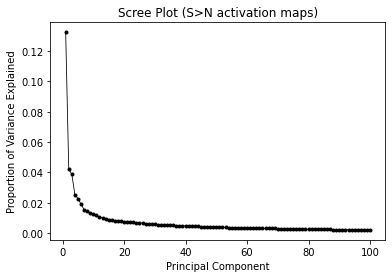

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
data = dataset.data
pca = PCA(svd_solver='full', n_components = 100, whiten=True)
pca.fit(data)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'k.-', linewidth=0.8)
plt.title('Scree Plot (S>N activation maps)')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [16]:
architectures = [
    LogisticRegression(C=0.75, penalty='l1', tol=0.01, solver='saga'),   
    SVC(),
    MLPClassifier(hidden_layer_sizes=(21,),solver='sgd', activation='logistic'),
    LogisticRegression(C=1, solver='sag', tol=1),
]

In [19]:
from sklearn.decomposition import PCA

train = int(len(data)*0.8)

model_plots = []
for model in architectures:
    for n in [70]:
        dataset.shuffle()
        data = dataset.data
        pca = PCA(svd_solver='full', n_components = n, whiten=True)
        pca.fit(data)
        proc_data = pca.transform(data)
        
        scores = cross_val_score(model, proc_data[0:train], dataset.labels[0:train], 
                                 cv=5, scoring='f1_macro')
        print(scores)
#         model.fit(proc_data[0:train], dataset.labels[0:train])
#         x_test = proc_data[train:]
#         y_test = dataset.labels[train:]
#         model_plots.append(plot_roc_curve(model, x_test, y_test))
#         plot_precision_recall_curve(model, x_test, y_test)
    

[0.56440804 0.61020734 0.63000443 0.66909091 0.57974869]
[0.65694444 0.63369963 0.61949493 0.56065936 0.60034423]


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.37799043 0.37799043 0.37799043 0.37799043 0.37681159]
[0.5385765  0.65008972 0.63000443 0.61087165 0.64854696]


In [27]:
# parameters = {
#     'C': np.linspace(0, 10, 40), 
#     'penalty': ('l1', 'l2', 'elasticnet', 'none'),
#     'tol': np.linspace(5, 0, 40), 
#     'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
#     }
# data = dataset.data
# pca = PCA(svd_solver='full', n_components = 70, whiten=True)
# pca.fit(data)
# proc_data = pca.transform(data)
        
# estimator = LogisticRegression()
# clf = GridSearchCV(estimator, parameters)
# clf.fit(proc_data, dataset.labels)

In [28]:
# clf.best_estimator_

Automatically created module for IPython interactive environment


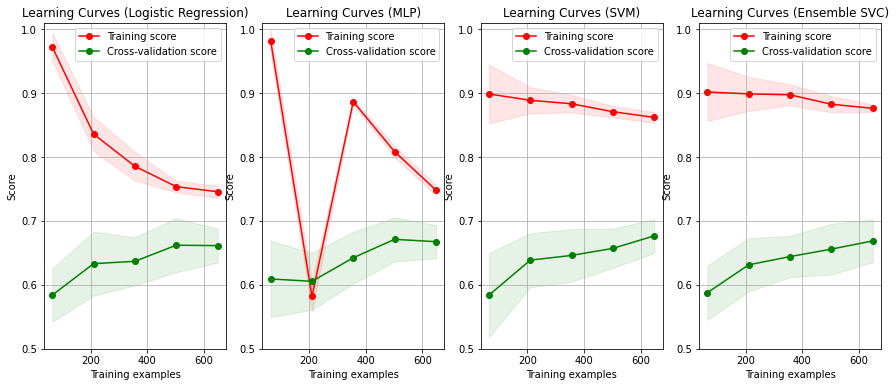

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(10, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

#     # Plot n_samples vs fit_times
#     axes[1].grid()
#     axes[1].plot(train_sizes, fit_times_mean, 'o-')
#     axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
#                          fit_times_mean + fit_times_std, alpha=0.1)
#     axes[1].set_xlabel("Training examples")
#     axes[1].set_ylabel("fit_times")
#     axes[1].set_title("Scalability of the model")

#     # Plot fit_time vs score
#     axes[2].grid()
#     axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
#     axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
#                          test_scores_mean + test_scores_std, alpha=0.1)
#     axes[2].set_xlabel("fit_times")
#     axes[2].set_ylabel("Score")
#     axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(1, 4, figsize=(15, 6))

X, y = load_digits(return_X_y=True)

X = proc_data 
y= dataset.labels

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

title = r"Learning Curves (Logistic Regression)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = LogisticRegression(C=0.75, penalty='l1', tol=0.01, solver='saga')

plot_learning_curve(estimator, title, X, y, axes=axes[0], ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (MLP)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = MLPClassifier(alpha=10)

plot_learning_curve(estimator, title, X, y, axes=axes[1], ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)


title = r"Learning Curves (SVM)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.01, C=1)

plot_learning_curve(estimator, title, X, y, axes=axes[2], ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (Ensemble SVC)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = BaggingClassifier(base_estimator=SVC())

plot_learning_curve(estimator, title, X, y, axes=axes[3], ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [29]:
# # Split the dataset in two equal parts

# data = dataset.data
# pca = PCA(svd_solver='full', n_components = 70, whiten=True)
# pca.fit(data)
# proc_data = pca.transform(data)

# X_train, X_test, y_train, y_test = train_test_split(
#     proc_data, dataset.labels, test_size=0.2, random_state=0)

# # Set the parameters by cross-validation
# tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                      'C': [1, 10, 100, 1000]},
#                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# scores = ['precision', 'recall']

# for score in scores:
#     print("# Tuning hyper-parameters for %s" % score)
#     print()

#     clf = GridSearchCV(
#         SVC(), tuned_parameters, scoring='%s_macro' % score
#     )
#     clf.fit(X_train, y_train)

#     print("Best parameters set found on development set:")
#     print()
#     print(clf.best_params_)
#     print()
#     print("Grid scores on development set:")
#     print()
#     means = clf.cv_results_['mean_test_score']
#     stds = clf.cv_results_['std_test_score']
#     for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#         print("%0.3f (+/-%0.03f) for %r"
#               % (mean, std * 2, params))
#     print()

#     print("Detailed classification report:")
#     print()
#     print("The model is trained on the full development set.")
#     print("The scores are computed on the full evaluation set.")
#     print()
#     y_true, y_pred = y_test, clf.predict(X_test)
#     print(classification_report(y_true, y_pred))
#     print()